## LẤY DỮ LIỆU CHÓ MÈO TỪ KAGGLE

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:49<00:00, 24.3MB/s]
100% 1.06G/1.06G [00:49<00:00, 23.2MB/s]


In [3]:
from zipfile import ZipFile

file_zip = "/content/dogs-vs-cats.zip"
with ZipFile(file_zip, 'r') as zip:
  zip.extractall('/content')
  zip.close()
  print("Giai nen thanh cong !")

Giai nen thanh cong !


## THÊM CÁC THƯ VIỆN CẦN THIẾT VÀ KẾT NỐI ĐẾN DRIVE

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from keras.utils import image_dataset_from_directory
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dense, Dropout

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## ĐỊNH NGHĨA MỘT VÀI THAM SỐ CẦN THIẾT

In [6]:
TRAIN_DIR = '/content/train'
TEST_DIR = '/content/test'
MODEL_NAME = '/content/drive/MyDrive/cv_project/dog-and-cat-classification-django/model/dog_cat_classification.h5'
BATCH_SIZE = 32
IMAGE_HEIGHT = 256
IMAGE_WIDTH = 256

## KHỞI TẠO DỮ LIỆU HUẤN LUYỆN VÀ DỮ LIỆU KIỂM THỬ

In [7]:
print("Du lieu huan luyen: ")
train_data = image_dataset_from_directory(
    directory =TRAIN_DIR,
    labels = 'inferred',
    label_mode = 'int',
    image_size = (IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size = BATCH_SIZE
)

print("Du lieu kiem thu: ")
test_data = image_dataset_from_directory(
    directory = TEST_DIR,
    labels = 'inferred',
    label_mode = 'int',
    image_size = (IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size = BATCH_SIZE
)

Du lieu huan luyen: 
Found 20000 files belonging to 2 classes.
Du lieu kiem thu: 
Found 5000 files belonging to 2 classes.


## CHUẨN HÓA DỮ LIỆU HUẤN LUYỆN VÀ DỮ LIỆU KIỂM THỬ

In [8]:
def normalize(img, label):
  img = tf.cast(img/255., tf.float32)
  return img, label

In [9]:
print("Chuan hoa du lieu huan luyen thanh cong !")
train_data = train_data.map(normalize)

print("Chuan hoa du lieu kiem thu thanh cong !")
test_data = test_data.map(normalize)

Chuan hoa du lieu huan luyen thanh cong !
Chuan hoa du lieu kiem thu thanh cong !


## KHỞI TẠO MÔ HÌNH CNN

In [31]:
model = Sequential([
    Conv2D(32, kernel_size = (3, 3), padding = 'valid', activation = 'relu', input_shape = (IMAGE_HEIGHT, IMAGE_WIDTH, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size = (2, 2), strides = 2, padding = 'valid'),

    Conv2D(64, kernel_size = (3, 3), padding = 'valid', activation = 'relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size = (2, 2), strides = 2, padding = 'valid'),

    Conv2D(128, kernel_size = (3, 3), padding = 'valid', activation = 'relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size = (2, 2), strides = 2, padding = 'valid'),

    Flatten(),

    Dense(128, activation = 'relu'),
    Dropout(0.1),
    Dense(64, activation = 'relu'),
    Dropout(0.1),
    Dense(1, activation = 'sigmoid')
])

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [33]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [34]:
history = model.fit(train_data, epochs = 10, validation_data = test_data)

Epoch 1/10
625/625 [==============================] - 70s 108ms/step - loss: 1.1836 - accuracy: 0.5885 - val_loss: 0.6122 - val_accuracy: 0.6708
Epoch 2/10
625/625 [==============================] - 67s 107ms/step - loss: 0.5595 - accuracy: 0.7113 - val_loss: 0.5380 - val_accuracy: 0.7472
Epoch 3/10
625/625 [==============================] - 67s 106ms/step - loss: 0.4743 - accuracy: 0.7724 - val_loss: 0.4917 - val_accuracy: 0.7466
Epoch 4/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4064 - accuracy: 0.8136 - val_loss: 0.4698 - val_accuracy: 0.7768
Epoch 5/10
625/625 [==============================] - 68s 108ms/step - loss: 0.3472 - accuracy: 0.8475 - val_loss: 0.5477 - val_accuracy: 0.7248
Epoch 6/10
625/625 [==============================] - 67s 107ms/step - loss: 0.2946 - accuracy: 0.8749 - val_loss: 0.5219 - val_accuracy: 0.7778
Epoch 7/10
625/625 [==============================] - 67s 107ms/step - loss: 0.2177 - accuracy: 0.9092 - val_loss: 0.4825 - val_ac

## LƯU MÔ HÌNH

In [35]:
model.save(MODEL_NAME)

## BIỂU DIỄN ĐỘ CHÍNH XÁC VÀ ĐỘ MẤT MÁT CỦA MÔ HÌNH

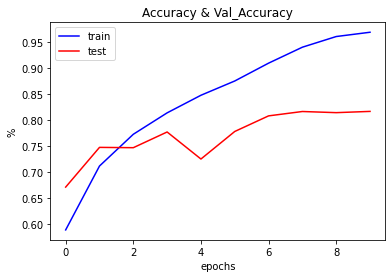

In [36]:
plt.plot(history.history['accuracy'], label = 'train', color = 'blue')
plt.plot(history.history['val_accuracy'], label = 'test', color = 'red')

plt.xlabel('epochs') 
plt.ylabel('%')

plt.title("Accuracy & Val_Accuracy")
plt.legend()
plt.show()

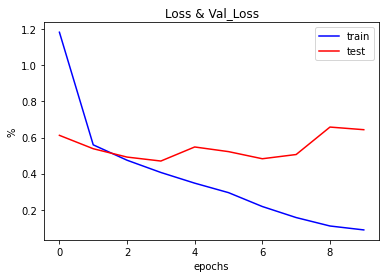

In [37]:
plt.plot(history.history['loss'], label = 'train', color = 'blue')
plt.plot(history.history['val_loss'], label = 'test', color = 'red')

plt.xlabel('epochs') 
plt.ylabel('%')

plt.title("Loss & Val_Loss")
plt.legend()
plt.show()

# KIỂM THỬ MÔ HÌNH

In [38]:
cat_image = cv2.imread('/content/cat.jpg')

In [39]:
dog_image = cv2.imread('/content/dog.jpg')

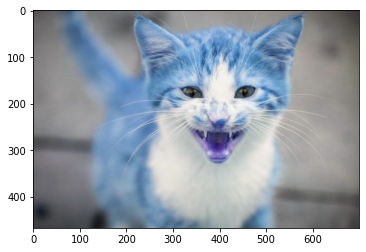

In [40]:
plt.imshow(cat_image);

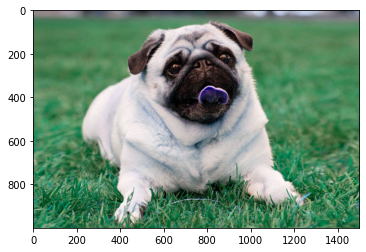

In [41]:
plt.imshow(dog_image);

In [42]:
cat_image_resize = cv2.resize(cat_image, (IMAGE_HEIGHT, IMAGE_WIDTH))

In [43]:
dog_image_resize = cv2.resize(dog_image, (IMAGE_HEIGHT, IMAGE_WIDTH))

In [44]:
cat_image_test = cat_image_resize.reshape(1, IMAGE_HEIGHT, IMAGE_WIDTH, 3)

In [45]:
dog_image_test = dog_image_resize.reshape(1, IMAGE_HEIGHT, IMAGE_WIDTH, 3)

In [46]:
def result(predict):
  label_cat = np.array([[0.]], dtype=np.float32)
  label_dog = np.array([[1.]], dtype=np.float32)
  if (predict == label_cat):
    print("Day la con meo")
  else:
    print("Day la con cho")

In [47]:
predict1 = model.predict(cat_image_test)
result(predict1)

1/1 [==============================] - 0s 103ms/step
Day la con meo


In [48]:
predict2 = model.predict(dog_image_test)
result(predict2)

1/1 [==============================] - 0s 18ms/step
Day la con cho
